## Performance Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from IPython.display import display

# Data directory
DATA_DIR = Path("data")

# Get the list of CSV files in the data directory
result_files = list(DATA_DIR.glob("*.csv"))

# Make sure at least one CSV file was found
if not result_files:
    raise FileNotFoundError("No CSV files found in 'data'.")

# Load non-empty CSV files into a dictionary of DataFrames
results = {
    file.name: pd.read_csv(file) for file in result_files if file.stat().st_size > 0
}

# Make sure at least one non-empty CSV file was found into a DataFrame
if not results:
    raise ValueError("No non-empty CSV files found.")

# Map expected filenames to quantization method names
methods = {
    "eval_sq_results.csv": "Scalar Quantization (SQ)",
    "eval_bq_results.csv": "Binary Quantization (BQ)",
    "eval_rvq_results.csv": "Residual Vector Quantization (RVQ)",
    "eval_pq_results.csv": "Product Quantization (PQ)",
    "eval_tsvq_results.csv": "Tree-Structured Quantization (TSVQ)",
    "eval_opq_results.csv": "Optimized Product Quantization (OPQ)",
}

# Display the DataFrames
dfs = []
for filename, df in results.items():
    df = df.copy()
    df["method"] = methods.get(filename, filename)  # Assign method name
    dfs.append(df)

    print(f"File: {filename}")
    display(df.drop(columns=["method"]))
    print("=" * 100)

File: eval_sq_results.csv


,n_samples,n_dims,training_time_ms,quantization_time_ms,reconstruction_error,recall
0,1000,128,0,0.700842,0.000001,0.990801
1,5000,128,0,3.457420,0.000001,0.989901
2,10000,128,0,6.726413,0.000001,0.988701
3,50000,128,0,34.588792,0.000001,0.989601
4,100000,128,0,67.816014,0.000001,0.989701


File: eval_bq_results.csv


,n_samples,n_dims,training_time_ms,quantization_time_ms,reconstruction_error,recall
0,1000,128,0,0.599221,0.083240,0.2751
1,5000,128,0,2.793779,0.083518,0.2031
2,10000,128,0,8.368819,0.083462,0.1725
3,50000,128,0,28.000463,0.083333,0.1901
4,100000,128,0,54.455544,0.083335,0.1889


File: eval_rvq_results.csv


,n_samples,n_dims,training_time_ms,quantization_time_ms,reconstruction_error,recall
0,1000,128,188.056279,61.748168,0.010145,0.0769
1,5000,128,1323.497939,364.324017,0.056431,0.0565
2,10000,128,2198.617426,684.750644,0.062624,0.0312
3,50000,128,14726.497861,2993.785729,0.059676,0.0291
4,100000,128,24895.466257,6549.135014,0.061311,0.0226


File: eval_pq_results.csv


,n_samples,n_dims,training_time_ms,quantization_time_ms,reconstruction_error,recall
0,1000,128,66.234954,16.911871,0.013303,0.412199
1,5000,128,440.838040,78.302904,0.018541,0.231400
2,10000,128,902.877214,173.436092,0.019639,0.194200
3,50000,128,7905.006579,1593.792150,0.020751,0.195500
4,100000,128,22734.246436,3186.348506,0.020894,0.198700


File: eval_tsvq_results.csv


,n_samples,n_dims,training_time_ms,quantization_time_ms,reconstruction_error,recall
0,1000,128,7.627638,4.169068,0.028214,0.5837
1,5000,128,16.777553,16.654739,0.068361,0.0183
2,10000,128,33.465374,31.285036,0.072936,0.0117
3,50000,128,237.850673,110.656341,0.076896,0.0084
4,100000,128,415.124337,271.187443,0.077492,0.0116


File: eval_opq_results.csv


,n_samples,n_dims,training_time_ms,quantization_time_ms,reconstruction_error,recall
0,1000,128,818.792442,40.489943,0.014482,0.385799
1,5000,128,5318.751470,178.639085,0.018881,0.227900
2,10000,128,10676.106072,315.683016,0.019806,0.197000
3,50000,128,53972.723747,1361.268409,0.020797,0.197600
4,100000,128,112816.036470,2356.983195,0.020926,0.197600


In [2]:
# Concatenate all DataFrames into a single DataFrame
df_all_pd = pd.concat(dfs, ignore_index=True)

# Set Seaborn style
sns.set_style("whitegrid")

# Helper function to plot a metric comparison
def plot_metric(metric, ylabel, marker):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df_all_pd, x="n_samples", y=metric, hue="method", marker=marker)
    plt.xlabel("Number of Vectors")
    plt.ylabel(ylabel)
    plt.title(f"{ylabel} Comparison")
    plt.legend(title="Quantization Method")
    plt.show()

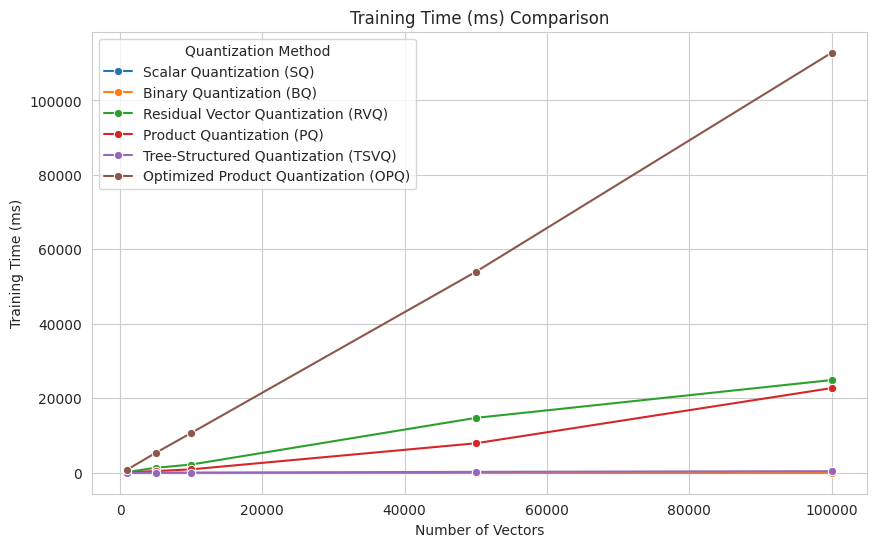

In [3]:
# Plot training time
plot_metric("training_time_ms", "Training Time (ms)", "o")

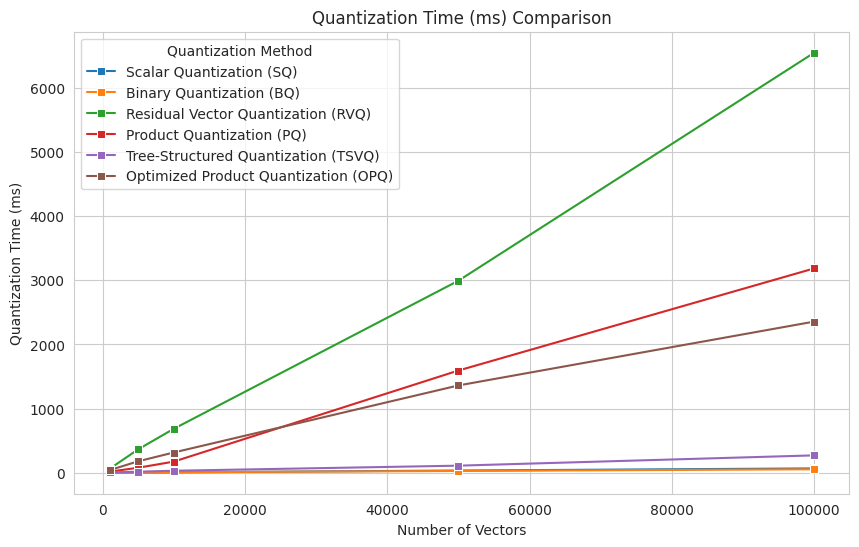

In [4]:
# Plot quantization time
plot_metric("quantization_time_ms", "Quantization Time (ms)", "s")

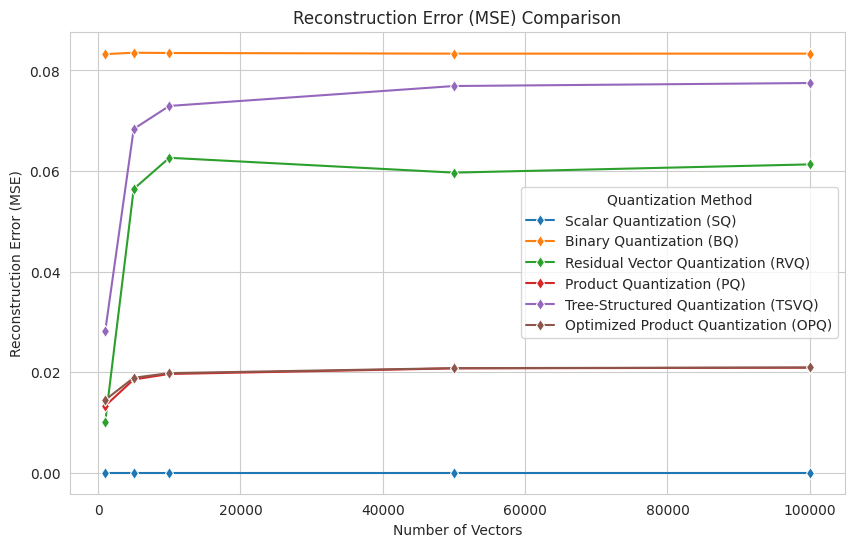

In [5]:
# Plot reconstruction_error
plot_metric("reconstruction_error", "Reconstruction Error (MSE)", "d")

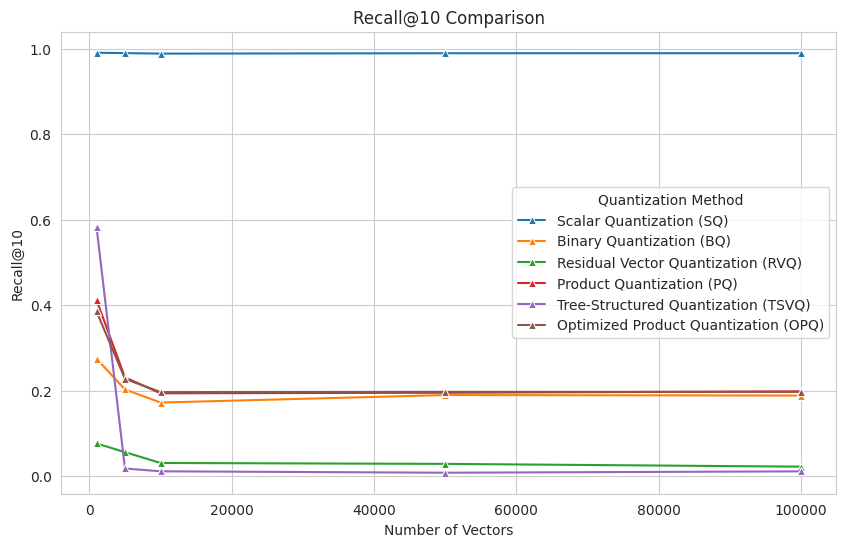

In [6]:
# Print recall_error
plot_metric("recall", "Recall@10", "^")

## Additional Analysis

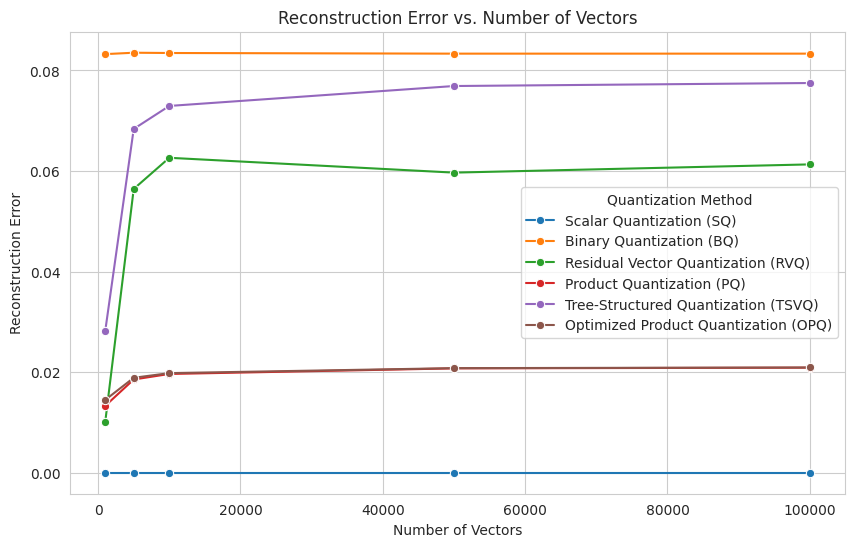

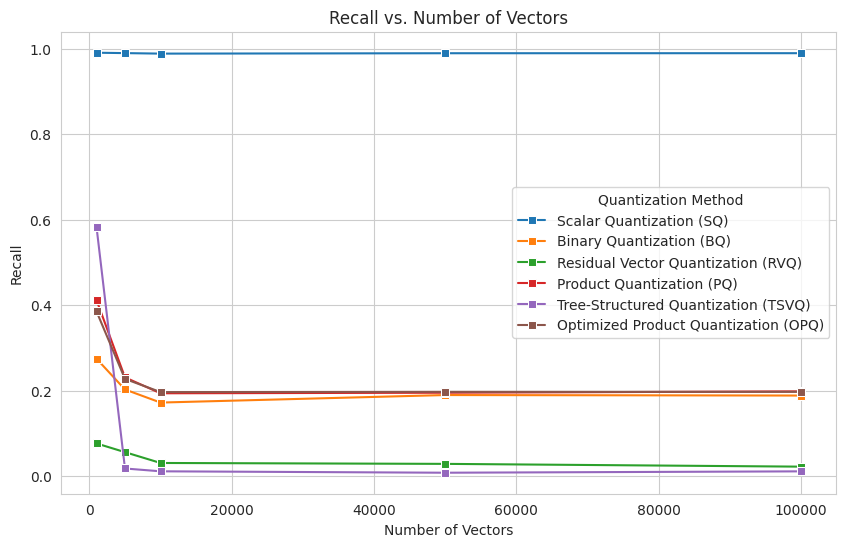

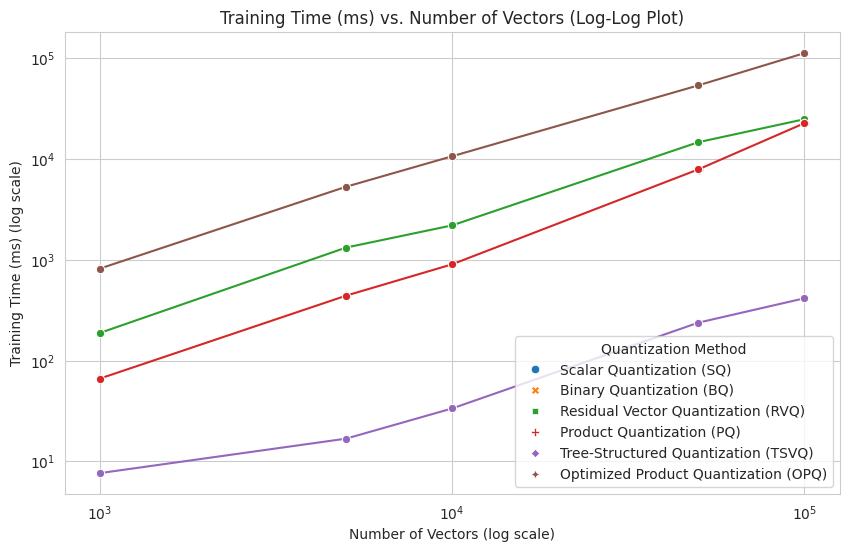

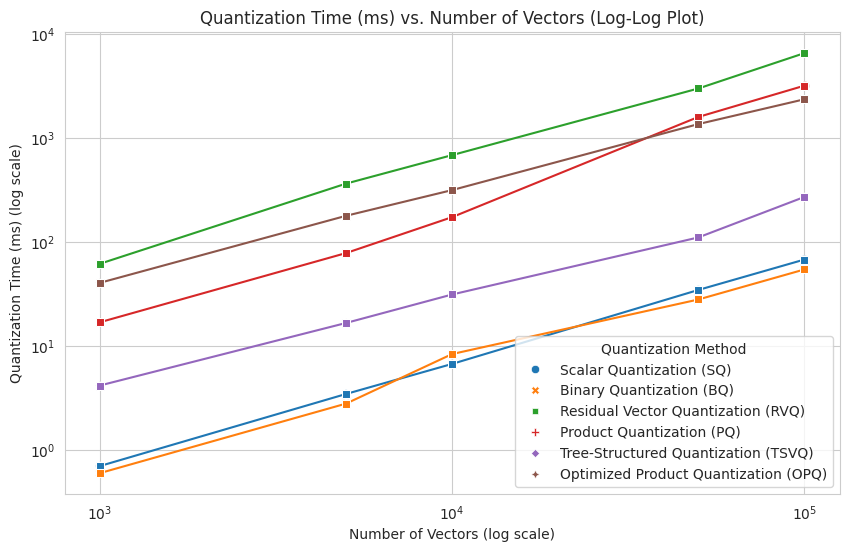

Summary Statistics by Quantization Method:
                                     n_samples                   \
                                           min     max     mean   
method                                                            
Binary Quantization (BQ)                  1000  100000  33200.0   
Optimized Product Quantization (OPQ)      1000  100000  33200.0   
Product Quantization (PQ)                 1000  100000  33200.0   
Residual Vector Quantization (RVQ)        1000  100000  33200.0   
Scalar Quantization (SQ)                  1000  100000  33200.0   
Tree-Structured Quantization (TSVQ)       1000  100000  33200.0   

                                     training_time_ms                \
                                                 mean        median   
method                                                                
Binary Quantization (BQ)                     0.000000      0.000000   
Optimized Product Quantization (OPQ)     36720.482040  10676.106072  

In [7]:
# ---------------------------------------------------------------------
# 1. Plot additional metrics: Reconstruction Error and Recall
# ---------------------------------------------------------------------

def plot_metric_linear(metric, ylabel, marker):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df_all_pd, x="n_samples", y=metric, hue="method", marker=marker)
    plt.xlabel("Number of Vectors")
    plt.ylabel(ylabel)
    plt.title(f"{ylabel} vs. Number of Vectors")
    plt.legend(title="Quantization Method")
    plt.show()

# Plot Reconstruction Error (linear scale)
plot_metric_linear("reconstruction_error", "Reconstruction Error", "o")

# Plot Recall (linear scale)
plot_metric_linear("recall", "Recall", "s")


# ---------------------------------------------------------------------
# 2. Plot Training and Quantization Time using log-log scales
# ---------------------------------------------------------------------

def plot_metric_log(metric, ylabel, marker):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_all_pd, x="n_samples", y=metric, hue="method", style="method")
    sns.lineplot(data=df_all_pd, x="n_samples", y=metric, hue="method", marker=marker, legend=False)
    plt.xlabel("Number of Vectors (log scale)")
    plt.ylabel(ylabel + " (log scale)")
    plt.xscale("log")
    plt.yscale("log")
    plt.title(f"{ylabel} vs. Number of Vectors (Log-Log Plot)")
    plt.legend(title="Quantization Method")
    plt.show()

# Plot Training Time on a log-log scale
plot_metric_log("training_time_ms", "Training Time (ms)", "o")

# Plot Quantization Time on a log-log scale
plot_metric_log("quantization_time_ms", "Quantization Time (ms)", "s")


# ---------------------------------------------------------------------
# 3. Compute and display summary statistics for each metric by method
# ---------------------------------------------------------------------

summary_stats = df_all_pd.groupby("method").agg({
    "n_samples": ["min", "max", "mean"],
    "training_time_ms": ["mean", "median", "std"],
    "quantization_time_ms": ["mean", "median", "std"],
    "reconstruction_error": ["mean", "median", "std"],
    "recall": ["mean", "median", "std"]
})

print("Summary Statistics by Quantization Method:")
print(summary_stats)